# Unspuervised Classification Using R for Soil NanoSIMS Images

Author: Yahan Hu, yahan.hu@tum.de

## 1. Get the right version R kernel in Jupyter Notebook
### Install necessary softwares
1. Install the latest [R 4.3.1](https://cloud.r-project.org/)  in Windows.
2. Install [Anaconda](https://www.anaconda.com/download/) and open Anaconda Prompt from the start menu.
### Install and Adjust R kernel for Jupyter Notebook 
1. Type `cd /d "your path/R/R-4.3.1"` where you installed your R. Hit return.
2. Type `cd bin`. Hit return.
3. Type `R.exe` to launch the command line R from the directory.
4. Install the package `IRkernel` which makes the newest R callable as an Jupyter kernel. Type `install.packages('IRkernel')` and hit return.
5. Type `IRkernel::installspec(name = 'Hackathon', displayname = 'R 4.3.1')` to create the latest R kernel. Both `name` and `displayname` can be changed into whatever you want.
6. Exit R and close any instances of Jupyter Notebooks you have running.
7. Launch Jupyter Notebook again and click to create a new notebook. You should find your kernel available by its display name in the drop down box.
*[Referenced Web](https://stackoverflow.com/questions/51647561/using-a-new-windows-version-of-r-in-jupyter-notebooks)*
## 2. Run a R-kernel notebook for Unsupervised Classification

### Preparation for the Unsupervised Clustering

In [1]:
# Clear environment
rm(list=ls()) 

### Step 1: Load all the needed stuff

1. Packages

In [2]:
# List out the necessary packages
pkg <- c("sp",           # Classes and Methods for Spatial Data
         "raster",       # Geographic Data Analysis and Modeling
         #"rgdal",       # Bindings for the 'Geospatial' Data Abstraction Library # retire this Oct -> replaced by next three
         "sf",           # Simple Features for R
         "stars",        # Spatiotemporal Arrays, Raster and Vector Data Cubes
         "terra",        # Spatial Data Analysis
         "ijtiff",       # Read and Write TIFF Images
         "lattice",      # Trellis Graphics for R
         "latticeExtra", # Extra Graphical Utilities Based on Lattice
         "ggplot2",      # Create Elegant Data Visualisations Using the Grammar of Graphics
         "scales",       # Scale Functions for Visualization
         "cluster",      # "Finding Groups in Data": Cluster Analysis Extended Rousseeuw et al.
         "factoextra",   # Extract and Visualize the Results of Multivariate Data Analyses
         "gridExtra")    # Miscellaneous Functions for "Grid" Graphics

# Load packages
lapply(pkg, library, character.only = TRUE)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: abind

terra 1.7.46


Attaching package: ‘ggplot2’


The following object is masked from ‘package:latticeExtra’:

    layer



Attaching package: ‘scales’


The following object is masked from ‘package:terra’:

    rescale


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



[[1]]
[1] "sp"        "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "raster"    "sp"        "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "sf"        "raster"    "sp"        "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "stars"     "abind"     "sf"        "raster"    "sp"        "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "terra"     "stars"     "abind"     "sf"        "raster"    "sp"       
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[6]]
 [1] "ijtiff"    "terra"     "stars"     "abind"     "sf"        "raster"   
 [7] "sp"        "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[7]]
 [1] "lattice"   "ijtiff"    "terra"     "stars"     "abind"     "sf"       
 [7] "raster"    "sp"        "stats"     "graphics"  "grDevices" "utils"    
[13] "datasets"  "methods"   "base"     

[[8]]
 [1] "latticeExtra" "lattice"      "ijtiff"       "terra"        "stars"       
 [6] "abind"        "sf"           "raster"       "sp"           "stats"       
[11] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[16] "base"        

[[9]]
 [1] "ggplot2"      "latticeExtra" "lattice"      "ijtiff"       "terra"       
 [6] "stars"        "abind"        "sf"           "raster"       "sp"          
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"        

[[10]]
 [1] "scales"       "ggplot2"      "latticeExtra" "lattice"      "ijtiff"      
 [6] "terra"        "stars"        "abind"        "sf"           "raster"      
[11] "sp"           "stats"        "graphics"     "grDevices"    "utils"       
[16] "datasets"     "methods"      "base"        

[[11]]
 [1] "cluster"      "scales"       "ggplot2"      "latticeExtra" "lattice"     
 [6] "ijtiff"       "terra"        "stars"        "abind"        "sf"          
[11] "raster"       "sp"           "stats"        "graphics"     "grDevices"   
[16] "utils"        "datasets"     "methods"      "base"        

[[12]]
 [1] "factoextra"   "cluster"      "scales"       "ggplot2"      "latticeExtra"
 [6] "lattice"      "ijtiff"       "terra"        "stars"        "abind"       
[11] "sf"           "raster"       "sp"           "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[13]]
 [1] "gridExtra"    "factoextra"   "cluster"      "scales"       "ggplot2"     
 [6] "latticeExtra" "lattice"      "ijtiff"       "terra"        "stars"       
[11] "abind"        "sf"           "raster"       "sp"           "stats"       
[16] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[21] "base"

2. Colors

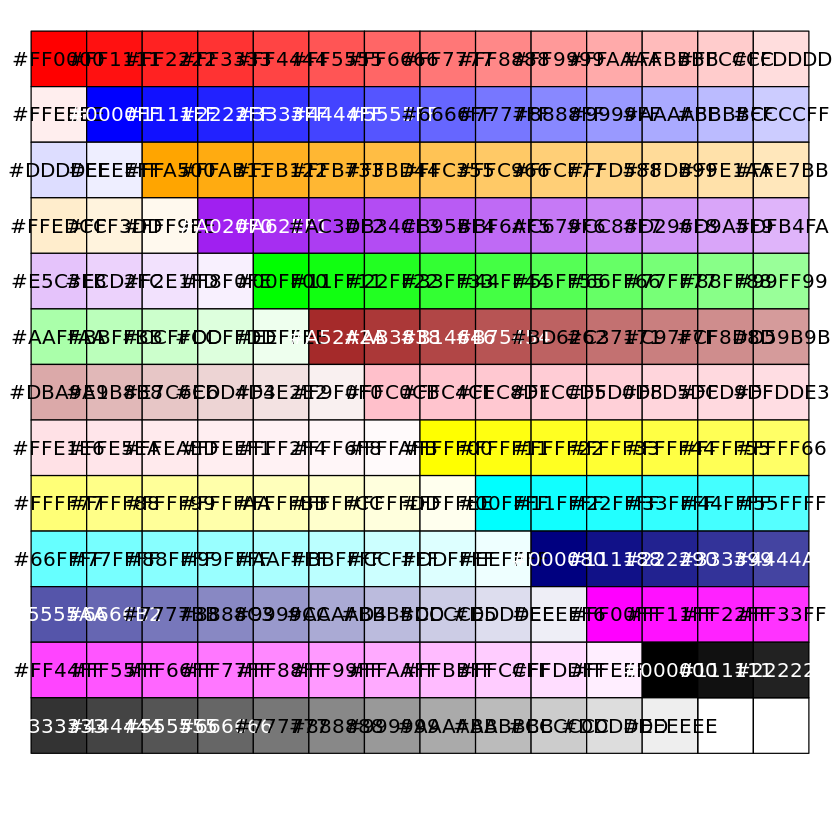

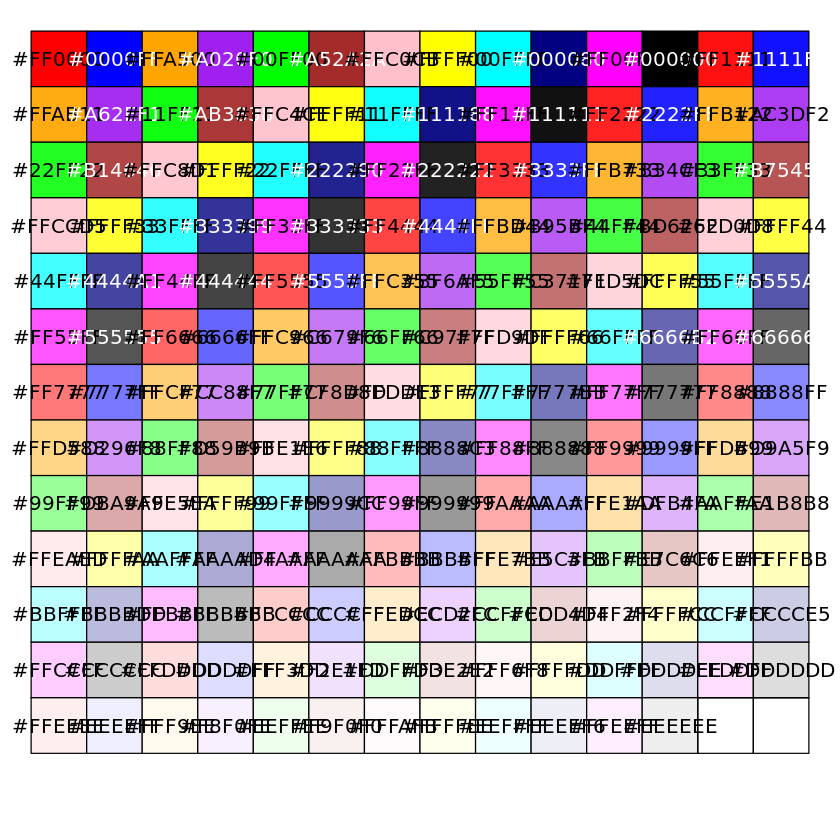

In [3]:
# Define the base colors with 12 basic colors
base_colors <- c('red', 'blue', 'orange', 'purple', 'green', 'brown', 'pink',
                 'yellow', 'cyan',  'navy', 'magenta', 'black')

# Set the fading degree for the color palette
num_colors <- 16

# Generate the fading color palette 
colors_fw <- sapply(base_colors, 
                    function(color) colorRampPalette(c(color, "white"))(num_colors)) # Use function to fade the basic colors

colors_f  <- colors_fw[-nrow(colors_fw),] # Exclude the white row

# Trans from DataFrame into List
colors_or <- as.vector(unlist(unlist(colors_f)))  # colors_or is a list with ordered colors

colors_nor <- as.vector(unlist(unlist(t(colors_f))))  # # colors_nor is a list with non-ordered colors

# Show the color palette
show_col(colors_or)
show_col(colors_nor)

3. Plot Settings

In [4]:
#create a grayscale color palette for the images
greyscale_cols <- gray.colors(100,            # number of different color levels 
                              start = 0.0,    # how black (0) to go
                              end = 1.0,      # how white (1) to go
                              gamma = 5,      # correction between how a digital 
                              alpha = NULL)   #Null=colors are not transparent
topo <- topo.colors(100,alpha = 0.5)          #Null=colors are not transparent

4. Tif files

In [5]:
# Set working directory
setwd('/tf/data/Marcus_Schiedung/dd_NanoSIMS')

# Load Tif file
Ras_original <- stack("S1_2.tif")

Warning message:
“[rast] unknown extent”


### Step 2: Preprocessing on original raster
1. give the names to corresponding channels

In [6]:
# Detailed info
Ras_name <- c('Na23', 'Mg24', 'Al27', 'K39', 'Ca40', 'Ca44','Fe56',
              'O16', 'C12', 'C13', 'CN26', 'CN27', 'Si28','Ca44O16')

names(Ras_original) <- Ras_name

Ras_original

class      : RasterStack 
dimensions : 256, 256, 65536, 14  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 0, 256, 0, 256  (xmin, xmax, ymin, ymax)
crs        : NA 
names      : Na23, Mg24, Al27, K39, Ca40, Ca44, Fe56, O16, C12, C13, CN26, CN27, Si28, Ca44O16 


2. Turn from a Raster brick into a dataframe

In [7]:
# Extract coordinates from the raster brick
coords <- coordinates(Ras_original)

# Initialize an empty dataframe
Ras_df <- data.frame(x = coords[, 1], y = coords[, 2])

# Loop through each layer, extract values, and add to the dataframe
for (i in 1:nlayers(Ras_original)) {
  layer_name <- names(Ras_original[[i]])
  layer_values <- getValues(Ras_original[[i]])
  Ras_df <- cbind(Ras_df, layer_values)
  colnames(Ras_df)[i + 2] <- layer_name
}

Ras_df <- na.omit(Ras_df)

# Print the resulting dataframe
summary(Ras_df)

Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”
Warning message:
“[rast] unknown extent”


       x                y               Na23             Mg24       
 Min.   :  0.50   Min.   :  0.50   Min.   :   0.0   Min.   :  0.00  
 1st Qu.: 64.25   1st Qu.: 64.25   1st Qu.:   3.0   1st Qu.:  1.00  
 Median :128.00   Median :128.00   Median :   8.0   Median :  6.00  
 Mean   :128.00   Mean   :128.00   Mean   :  22.4   Mean   : 21.54  
 3rd Qu.:191.75   3rd Qu.:191.75   3rd Qu.:  19.0   3rd Qu.: 26.00  
 Max.   :255.50   Max.   :255.50   Max.   :3403.0   Max.   :772.00  
      Al27           K39              Ca40             Ca44      
 Min.   :   0   Min.   :   0.0   Min.   :  0.00   Min.   :  0.0  
 1st Qu.:  50   1st Qu.:  16.0   1st Qu.:  6.00   1st Qu.:  7.0  
 Median : 153   Median :  52.0   Median : 15.00   Median : 16.0  
 Mean   : 382   Mean   : 325.4   Mean   : 25.86   Mean   : 30.1  
 3rd Qu.: 584   3rd Qu.: 318.0   3rd Qu.: 34.00   3rd Qu.: 40.0  
 Max.   :2693   Max.   :9592.0   Max.   :476.00   Max.   :436.0  
      Fe56             O16             C12             

3. Use Min-Max Normalization method to scale the ion data from 0 to 1

In [8]:
## Min-Max Normalize

#define Min-Max normalization function
min_max_norm <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

In [9]:
#apply Min-Max normalization to first four columns in iris dataset
Ras_norm <- as.data.frame(lapply(Ras_df[-c(1,2)], min_max_norm))

Ras_norm$x <- Ras_df$x
Ras_norm$y <- Ras_df$y

#view first six rows of normalized iris dataset
summary(Ras_norm)

      Na23                Mg24               Al27              K39          
 Min.   :0.0000000   Min.   :0.000000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.0008816   1st Qu.:0.001295   1st Qu.:0.01857   1st Qu.:0.001668  
 Median :0.0023509   Median :0.007772   Median :0.05681   Median :0.005421  
 Mean   :0.0065829   Mean   :0.027897   Mean   :0.14185   Mean   :0.033923  
 3rd Qu.:0.0055833   3rd Qu.:0.033679   3rd Qu.:0.21686   3rd Qu.:0.033153  
 Max.   :1.0000000   Max.   :1.000000   Max.   :1.00000   Max.   :1.000000  
      Ca40              Ca44              Fe56               O16         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.01260   1st Qu.:0.01605   1st Qu.:0.001449   1st Qu.:0.08242  
 Median :0.03151   Median :0.03670   Median :0.008696   Median :0.26075  
 Mean   :0.05432   Mean   :0.06905   Mean   :0.034090   Mean   :0.26238  
 3rd Qu.:0.07143   3rd Qu.:0.09174   3rd Qu.:0.037681   3rd Qu.:0.41340  
 Max.   :1.00000 

4. Extract the ion data we are interested in 

In [10]:
# Extract Basic Channels OCCN
OCCN_names <- c("O16", "C12", "C13", "CN26", "CN27" )

Ras_OCCN <- Ras_norm[, colnames(Ras_norm) %in% OCCN_names]

# Check the detailed info in the modified raster
summary(Ras_OCCN)

      O16               C12               C13               CN26        
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.08242   1st Qu.:0.07834   1st Qu.:0.06744   1st Qu.:0.05436  
 Median :0.26075   Median :0.30618   Median :0.26678   Median :0.12726  
 Mean   :0.26238   Mean   :0.29404   Mean   :0.25904   Mean   :0.17913  
 3rd Qu.:0.41340   3rd Qu.:0.49183   3rd Qu.:0.43051   3rd Qu.:0.24352  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      CN27        
 Min.   :0.00000  
 1st Qu.:0.03453  
 Median :0.10185  
 Mean   :0.14350  
 3rd Qu.:0.19949  
 Max.   :1.00000  

## Conduct K-Means Classification on the Interested Dataset
### Step 1: Choose the Optimal K Number for this Dataset

In [11]:
# Cleaned up the garbage
gc()

used    (Mb)  gc trigger (Mb)  max used (Mb) 
Ncells 2728493 145.8  4216948   225.3 4216948  225.3
Vcells 5792880  44.2 10146329    77.5 8383012   64.0

Show the elbow plot of K Means result

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3276800)”
Warning message:
“Quick-TRANSfer stage steps ex

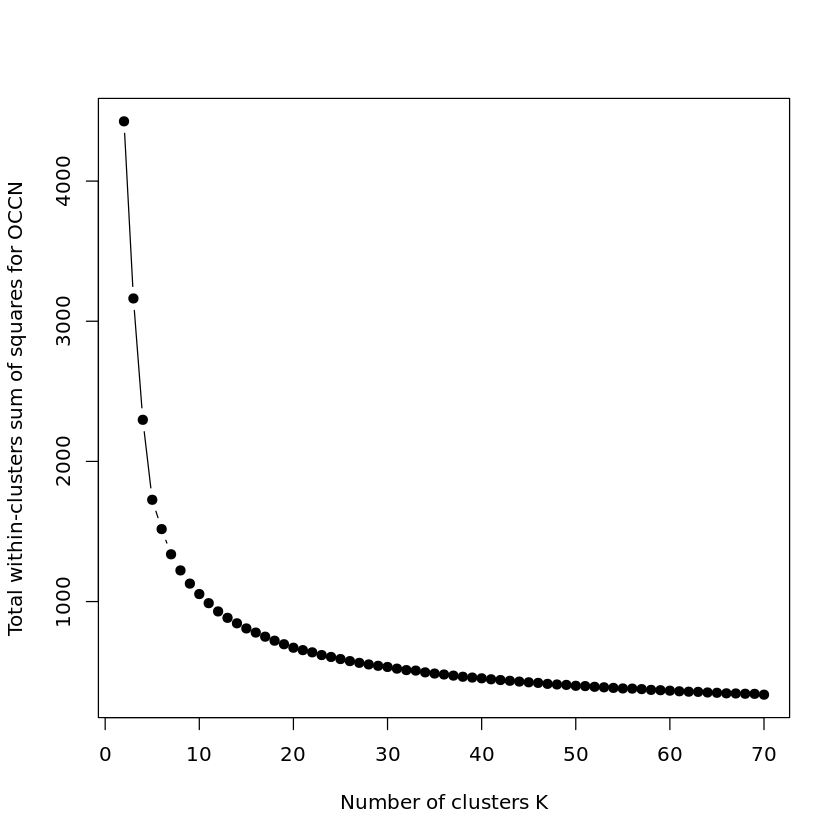

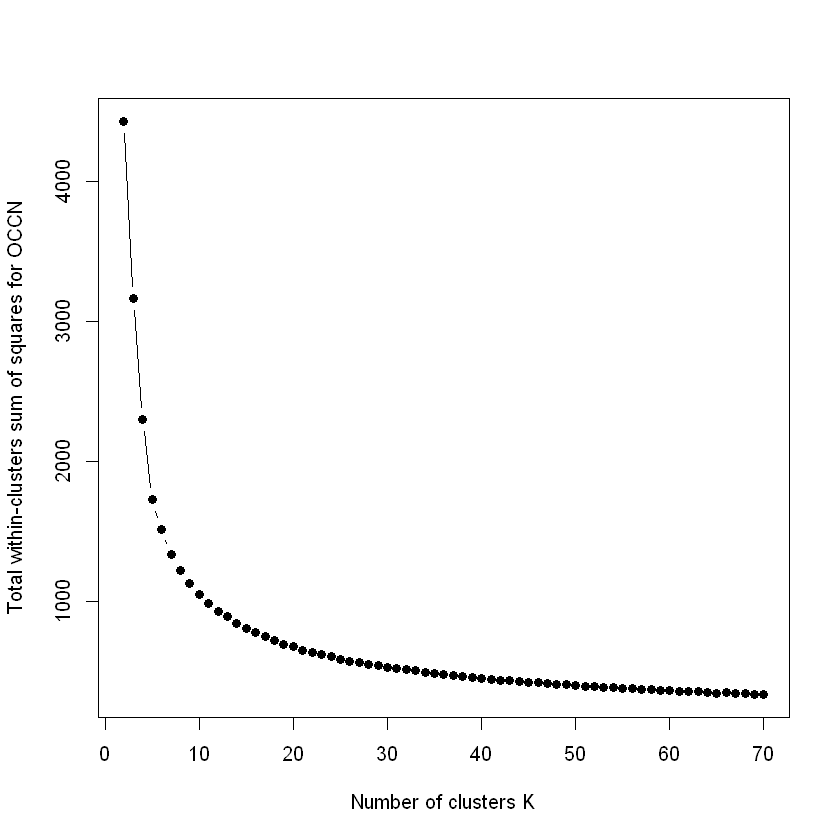

In [12]:
## Calculate the the K number for KMeans 
k.max<- 70
wss_OCCN <- sapply(2:k.max, function(k){kmeans(Ras_OCCN, k, nstart=10 )$tot.withinss})

# Plot the wss curve
plot(2:k.max, wss_OCCN, type="b", pch = 19,  
     xlab="Number of clusters K", 
     ylab="Total within-clusters sum of squares for OCCN")

## Step 2: Conduct K-Means Clustering with 70 Clusters

In [12]:
# Set the number for K-means as large as possible for furter re-grouping
K <- 70

# Conduct K-means clustering 
Ras_OCCN_kmeans <- kmeans(Ras_OCCN, 
                     algorithm = "Lloyd",
                     centers = K,      # the variable that determines the number of clusters
                     iter.max = 1000,    # sets the maximum number of iterations allowed for the k-means algorithm to converge
                     nstart = 100)     # 100 random initializations and selects the best solution

# Add cluster assigment to original data
Ras_OCCN_cluster <- cbind(Ras_OCCN, 
                          class = Ras_OCCN_kmeans$cluster, 
                          x = Ras_norm$x,
                          y = Ras_norm$y)

# View the clustered result
head(Ras_OCCN_cluster)

O16       C12       C13       CN26      CN27       class x   y    
1 0.3261604 0.2463718 0.2524864 0.1703577 0.11622674 61    0.5 255.5
2 0.3698424 0.2496597 0.2603710 0.1712684 0.08438437 61    1.5 255.5
3 0.3898049 0.2551091 0.2613551 0.1835060 0.16330346 61    2.5 255.5
4 0.3842042 0.2504030 0.2353766 0.1878589 0.14616074 61    3.5 255.5
5 0.3673710 0.2505211 0.2146822 0.1817424 0.19765103 61    4.5 255.5
6 0.3366894 0.2856556 0.2491050 0.1995654 0.14464257 61    5.5 255.5

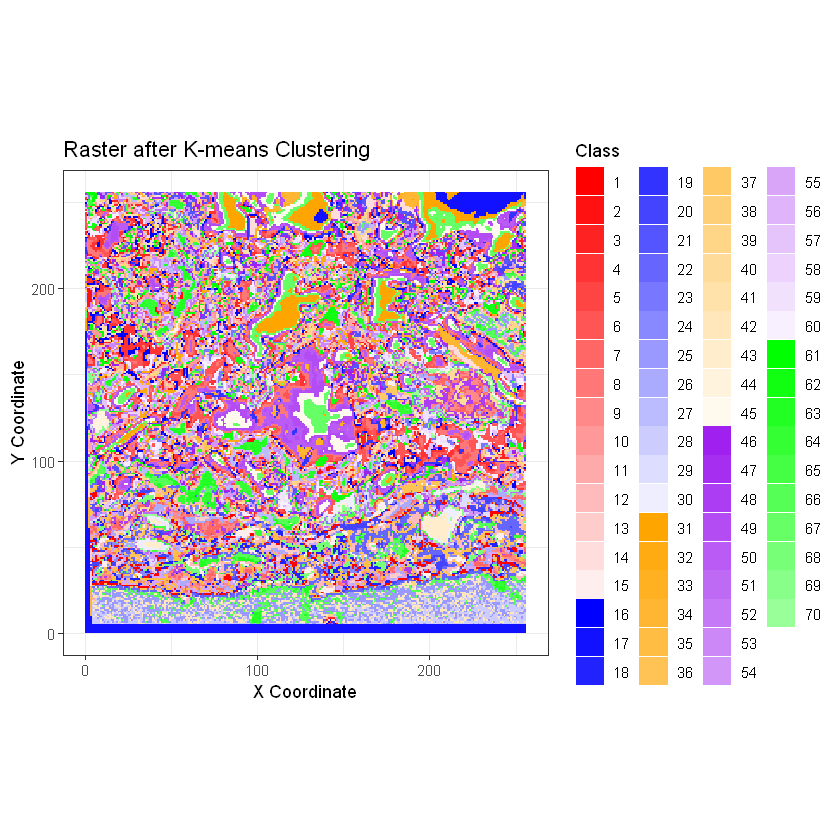

In [14]:
## Plots
# Create a filled pixel plot
ggplot(Ras_OCCN_cluster, aes(x = x, y = y, fill = as.factor(class))) +
  geom_tile() +
  labs(title = "Raster after K-means Clustering", x = "X Coordinate", y = "Y Coordinate") +
  scale_fill_manual(name = "Class", values = colors_or, guide = guide_legend()) +
  coord_fixed(ratio = 1) +  # Set aspect ratio to 1 for a squared plot
  theme_bw()

In [ ]:
setwd("D:/B_6 pretest-2023 August/pic_unsuper_2")
ggsave(file = "KMeans_OCCN_pixel.png", plot = Plot_OCCN_70Cluster, width = 10, height = 8, dpi = 600)

In [15]:
# Create the df containg all the mean values and clusters
Ras_OCCN_clusterMean <- as.data.frame(Ras_OCCN_kmeans$centers)
Ras_OCCN_clusterMean$class <- as.factor(rownames(Ras_OCCN_clusterMean))

head(Ras_OCCN_clusterMean)

O16       C12        C13        CN26       CN27       class
1 0.0799946 0.50324781 0.44042678 0.39610196 0.25607846 1    
2 0.3332785 0.76192110 0.69186000 0.14963650 0.12112609 2    
3 0.3559697 0.31630688 0.27703542 0.12596410 0.07810824 3    
4 0.4692743 0.09682117 0.08345702 0.06319495 0.04720071 4    
5 0.3477244 0.44405965 0.39919035 0.24572208 0.20366407 5    
6 0.5129381 0.03777648 0.03201914 0.03502878 0.02591258 6

### Step 3: Check the Mean Classes Curve of each ions' counts

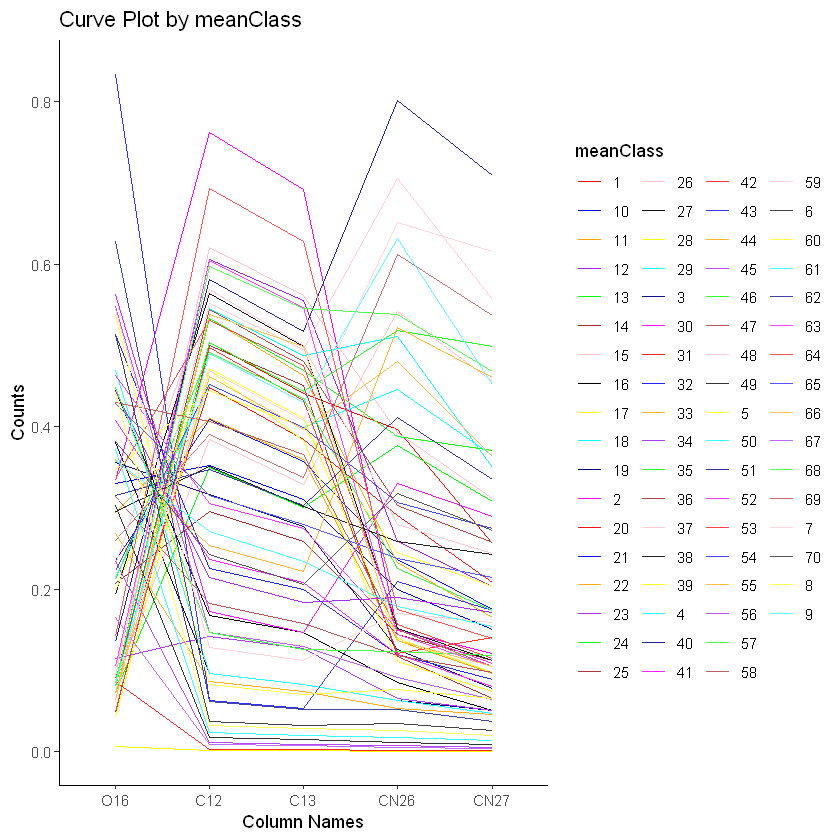

In [17]:
# Create a long-format dataframe for plotting
plot_OCCN_clusterMean <- reshape2::melt(Ras_OCCN_clusterMean, id.vars = "class")

# Create a plot
ggplot(plot_OCCN_clusterMean, aes(x = variable, y = value, color = class, group = class)) +
  geom_line() +
  labs(title = "Curve Plot by meanClass", x = "Column Names", y = "Counts") +
  scale_color_manual(values = colors_nor, name = "meanClass") +
  theme_classic()

In [ ]:
ggsave(file = "KMeans_OCCN_curve.png", plot = Plot_OCCN_70Curves, width = 14, height = 8, dpi = 600)

## Re-Group the K-Means results using Hierarchical Clustering

### Step 1: Choose the Optimal number for these K-Means results

In [18]:
#define linkage methods
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

#function to compute agglomerative coefficient
ac_OCCN <- function(x) {
  agnes(Ras_OCCN_clusterMean[,-ncol(Ras_OCCN_clusterMean)], method = x)$ac
}

#calculate agglomerative coefficient for each clustering linkage method
coefficients_OCCN <- sapply(m, ac_OCCN)

# Find the method with the largest coefficient
best_OCCN_method <- names(coefficients_OCCN)[which.max(coefficients_OCCN)]

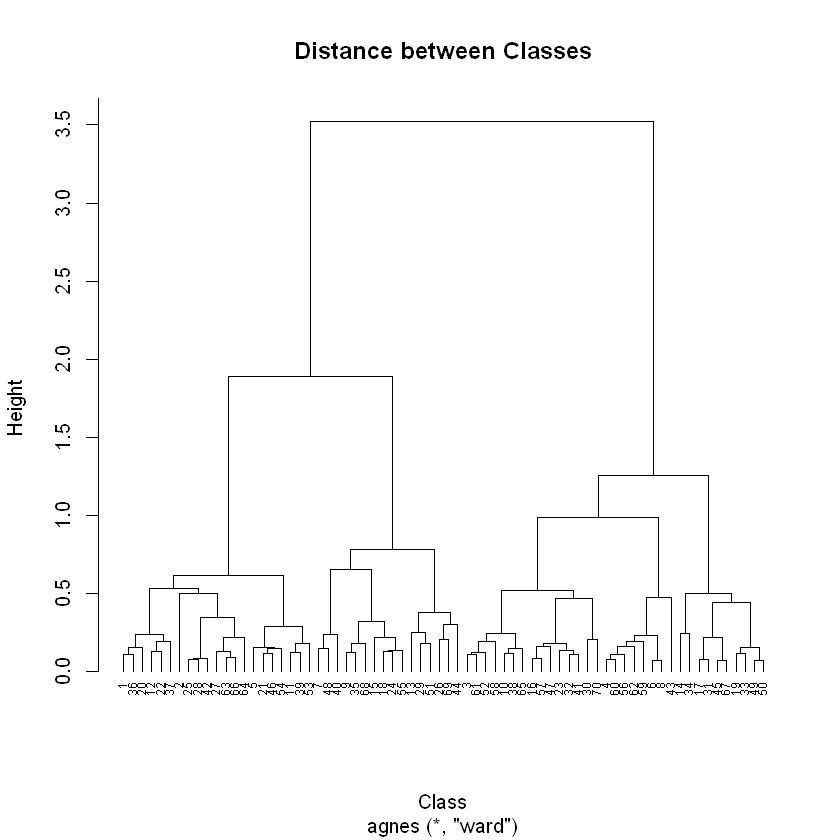

In [19]:
#perform hierarchical clustering using Ward's minimum variance
clust_OCCN <- agnes(Ras_OCCN_clusterMean[,-ncol(Ras_OCCN_clusterMean)], method = best_OCCN_method)

#produce dendrogram
pltree(clust_OCCN, cex = 0.6, hang = -1,  
       xlab = "Class", main = 'Distance between Classes')

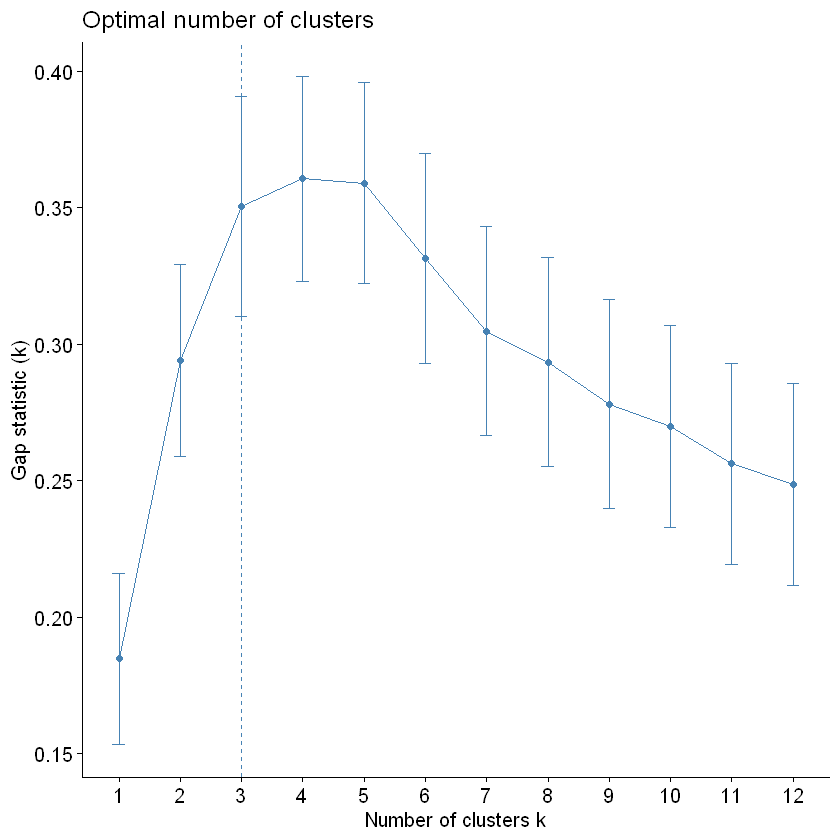

In [20]:
### Pick the best regroup number 
#calculate gap statistic for each number of clusters (up to 12 clusters)
gap_OCCN_stat <- clusGap(Ras_OCCN_clusterMean[,-ncol(Ras_OCCN_clusterMean)], FUN = hcut, 
                    nstart = 25, K.max = 12, B = 50)

#produce plot of clusters vs. gap statistic
fviz_gap_stat(gap_OCCN_stat)

###problem here
num_OCCN_gr <- with(gap_OCCN_stat,maxSE(Tab[,"gap"],Tab[,"SE.sim"]))

Ras_OCCN_groups <- cutree(clust_OCCN, k=num_OCCN_gr)

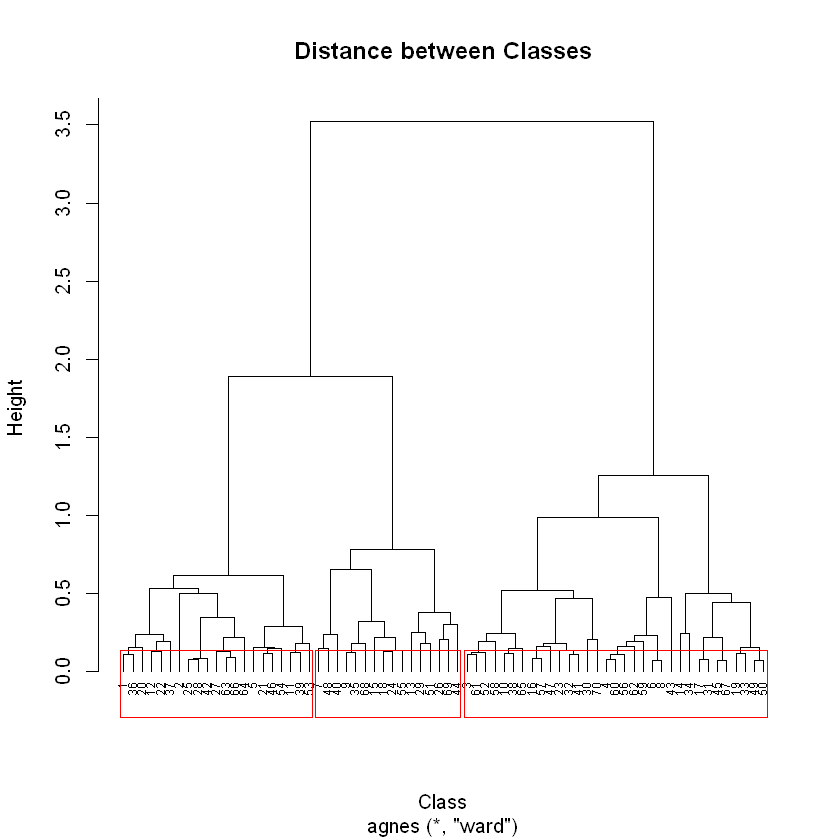

In [21]:
#produce dendrogram
pltree(clust_OCCN, cex = 0.6, hang = -1,  
       xlab = "Class", main = 'Distance between Classes')

# Add rectangles to highlight clusters
rect.hclust(clust_OCCN, k = num_OCCN_gr, border = "red")

### Step 2: Combine the K-Means and Hierarchical results together

In [22]:
#find number of observations in each cluster
table(Ras_OCCN_groups)

#append cluster labels to original data
Ras_OCCN_regroup <- cbind(Ras_OCCN_clusterMean, regroup = Ras_OCCN_groups)

#display first six rows of final data
head(Ras_OCCN_regroup)

Ras_OCCN_groups
 1  2  3 
21 33 16 

O16       C12        C13        CN26       CN27       class regroup
1 0.0799946 0.50324781 0.44042678 0.39610196 0.25607846 1     1      
2 0.3332785 0.76192110 0.69186000 0.14963650 0.12112609 2     1      
3 0.3559697 0.31630688 0.27703542 0.12596410 0.07810824 3     2      
4 0.4692743 0.09682117 0.08345702 0.06319495 0.04720071 4     2      
5 0.3477244 0.44405965 0.39919035 0.24572208 0.20366407 5     1      
6 0.5129381 0.03777648 0.03201914 0.03502878 0.02591258 6     2

In [23]:
### Generate the Regroup df
gr_OCCN_cl <- as.data.frame(table(Ras_OCCN_groups))
gr_OCCN_cl

Ras_OCCN_groups Freq
1 1               21  
2 2               33  
3 3               16

In [24]:
## Create suitable color list
# Initialize an empty list to store color palettes
color_palettes <- list()

# Iterate through each row in the dataframe
for (i in 1:nrow(gr_OCCN_cl)) {
  gr_bcolor <- base_colors[i]
  gr_color_w <- sapply(gr_bcolor,
                       function(color) colorRampPalette(c(color, "white"))(gr_OCCN_cl$Freq[i] + 1))
  gr_color <- gr_color_w[-nrow(gr_color_w), ]
  color_palettes[[i]] <- gr_color
}

# Create a named list of color palettes
colors_OCCN_list <- setNames(color_palettes, gr_OCCN_cl$groups)                       
colors_OCCN_list[[1]]

[1] "#FF0000" "#FF0C0C" "#FF1818" "#FF2424" "#FF3030" "#FF3C3C" "#FF4848"
 [8] "#FF5555" "#FF6161" "#FF6D6D" "#FF7979" "#FF8585" "#FF9191" "#FF9D9D"
[15] "#FFAAAA" "#FFB6B6" "#FFC2C2" "#FFCECE" "#FFDADA" "#FFE6E6" "#FFF2F2"

### Step 3: Visualize the Regrouped Clustering Curves

In [25]:
## Plot the regroup plot 
# Create a grid layout
cols <- 3  # Number of columns in the grid
rows <- ceiling(num_OCCN_gr / cols)  # Number of rows in the grid

In [26]:
# Create a function to draw curve plots for each group
draw_curve_plot <- function(data, group) {
  # Filter data for the current group
  group_data <- subset(data, group == regroup)
  
  # Create a long-format dataframe for plotting
  plot_data <- reshape2::melt(group_data, id.vars = c("class", "regroup"))
  
  # Create a plot for the current group
  p <- ggplot(plot_data, aes(x = variable, y = value, color = class, group = class)) +
    geom_line() +
    labs(title = paste("Curve Plot by meanClass for Group", group),
         x = "Column Names", y = "Counts") +
    scale_color_manual(values = colors_OCCN_list[[as.numeric(group)]], name = "meanClass")+
    theme_classic()
  
  return(p)
}

In [32]:
# Loop through each group and draw the curve plot
group_OCCN_list <- unique(Ras_OCCN_regroup$regroup)
plot_OCCN_list <- lapply(group_OCCN_list, draw_curve_plot, data = Ras_OCCN_regroup)

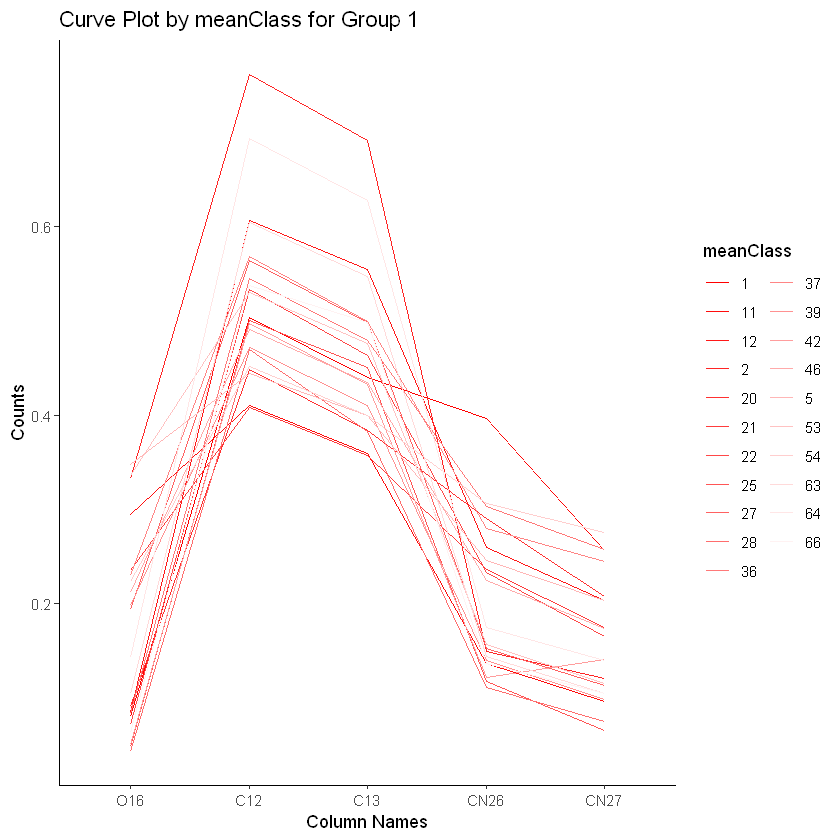

[[1]]

[[2]]

[[3]]


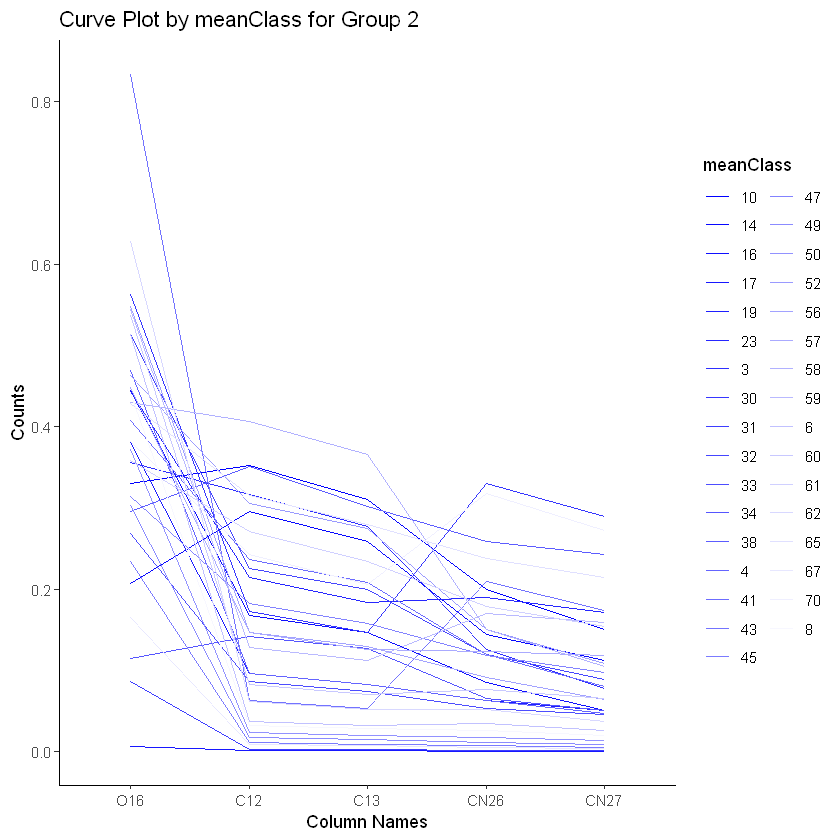

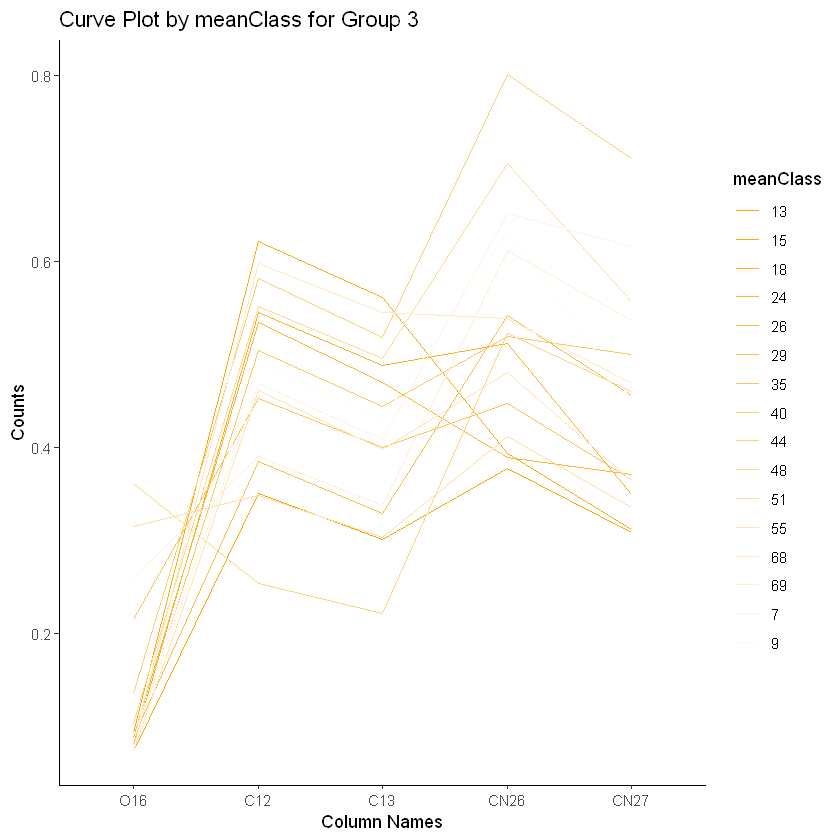

In [28]:
plot_OCCN_list 

In [ ]:
ggsave(file = "KMeans_OCCN_regroup_curve.png", plot = grid_OCCN, width = 18, height = 8, dpi = 600)

### Step 4: Visualize the Regrouped plot

In [29]:
## Assign regroup result into df
# Assign group information from df1 to df2 based on common class numbers
Ras_OCCN_cluster$regroup <- Ras_OCCN_regroup$regroup[match(Ras_OCCN_cluster$class, Ras_OCCN_regroup$class)]

# Split regroup 
split_OCCN_df <- split(Ras_OCCN_cluster, Ras_OCCN_cluster$regroup)

In [30]:
# Create a list to store modified data frames
colored_OCCN_dfs <- list()

# Loop through the list of dataframes and assign colors sequentially
for (i in as.numeric(names(split_OCCN_df))) {
  df <- split_OCCN_df[[i]]
  colors <- colors_OCCN_list[[i]]
  
  # Step 1: Already done in the loop
  # Step 2: Get unique levels of 'class' column
  level_df <- levels(as.factor(df$class))
  
  # Step 3: Assign colors based on matching levels
  for (m in 1:length(df$class)) {
    for (n in 1:length(level_df)) {
      if (df$class[m] == level_df[n]) {
        df$color[m] <- colors[n]
        break  # No need to continue checking once matched
      }
    }
  }
  colored_OCCN_dfs[[i]] <- df
}

Ras_OCCN_re_col <- do.call(rbind, colored_OCCN_dfs)

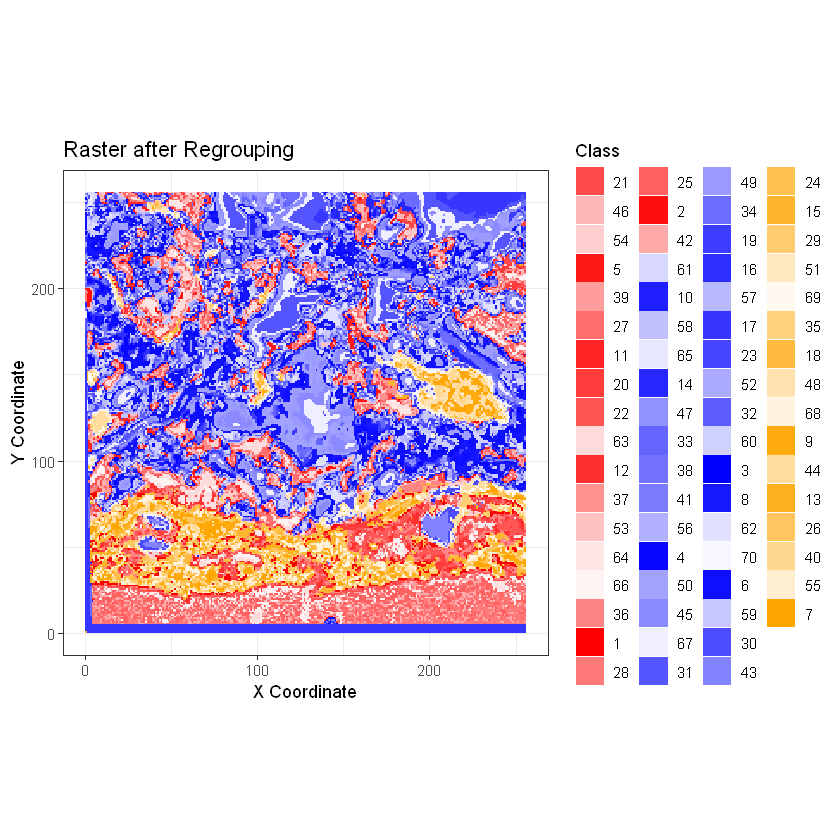

In [31]:
# Create a filled pixel plot

Ras_OCCN_re_col$class <- factor(Ras_OCCN_re_col$class)
Ras_OCCN_re_col$regroup <- factor(Ras_OCCN_re_col$regroup)

ggplot(Ras_OCCN_re_col, aes(x = x, y = y, fill = Ras_OCCN_re_col$class)) +
  geom_tile() +
  labs(title = "Raster after Regrouping", 
       x = "X Coordinate", y = "Y Coordinate",
       fill = "Class") +
  scale_fill_manual(values = Ras_OCCN_re_col$color, 
                    breaks = Ras_OCCN_re_col$class, 
                    labels = Ras_OCCN_re_col$class) +
  coord_fixed(ratio = 1) +
  geom_rect(xmin = 0, xmax = 1, ymin = 0, ymax = 1) +
  theme(legend.position = "right") +
  theme_bw()